## Reading the midi File and finding the chords

In [13]:
from Tonnetz_Select import *

In [14]:
chordListConnectNoDoubles, Tonnetz = fromMidiToPCS('Midi_files\TESTING\simple_midi.mid')

14


## Trajectory Calculations

### Computing Trajectory (Attention trjectory is an object !)

In [17]:
from TrajectoryCalculationsWithClass import *

In [19]:
trajectory = NewTrajectory(chordListConnectNoDoubles, Tonnetz)

### Let's find the edges

In [12]:
import itertools as itt
def TrajectoryNoteEdges(TrajectoryPoints, Tonnetz):
    TotalEdges = []
    dist = [-1, 0, 1]
    for dicts in TrajectoryPoints:
        chordEdges = []
        l = list(itt.product(dicts.values(), dicts.values()))
        for couple in l:
            (x1, y1), (x2, y2) = couple
            if (x1 - x2) in dist  and (y1 - y2) in dist:
                if not (((x1 - x2) == 1 and (y1 - y2) == -1) or ((x1 - x2) == -1 and (y1 - y2) == 1)) :
                    chordEdges.append(couple)
        TotalEdges.append(chordEdges)
    return TotalEdges

In [13]:
TrajectoryEdges = TrajectoryNoteEdges(trajectory.chordPositions, Tonnetz)

TypeError: 'TrajectoryClass' object is not iterable

### Let's plot that!

First just Points

<IPython.core.display.Javascript object>


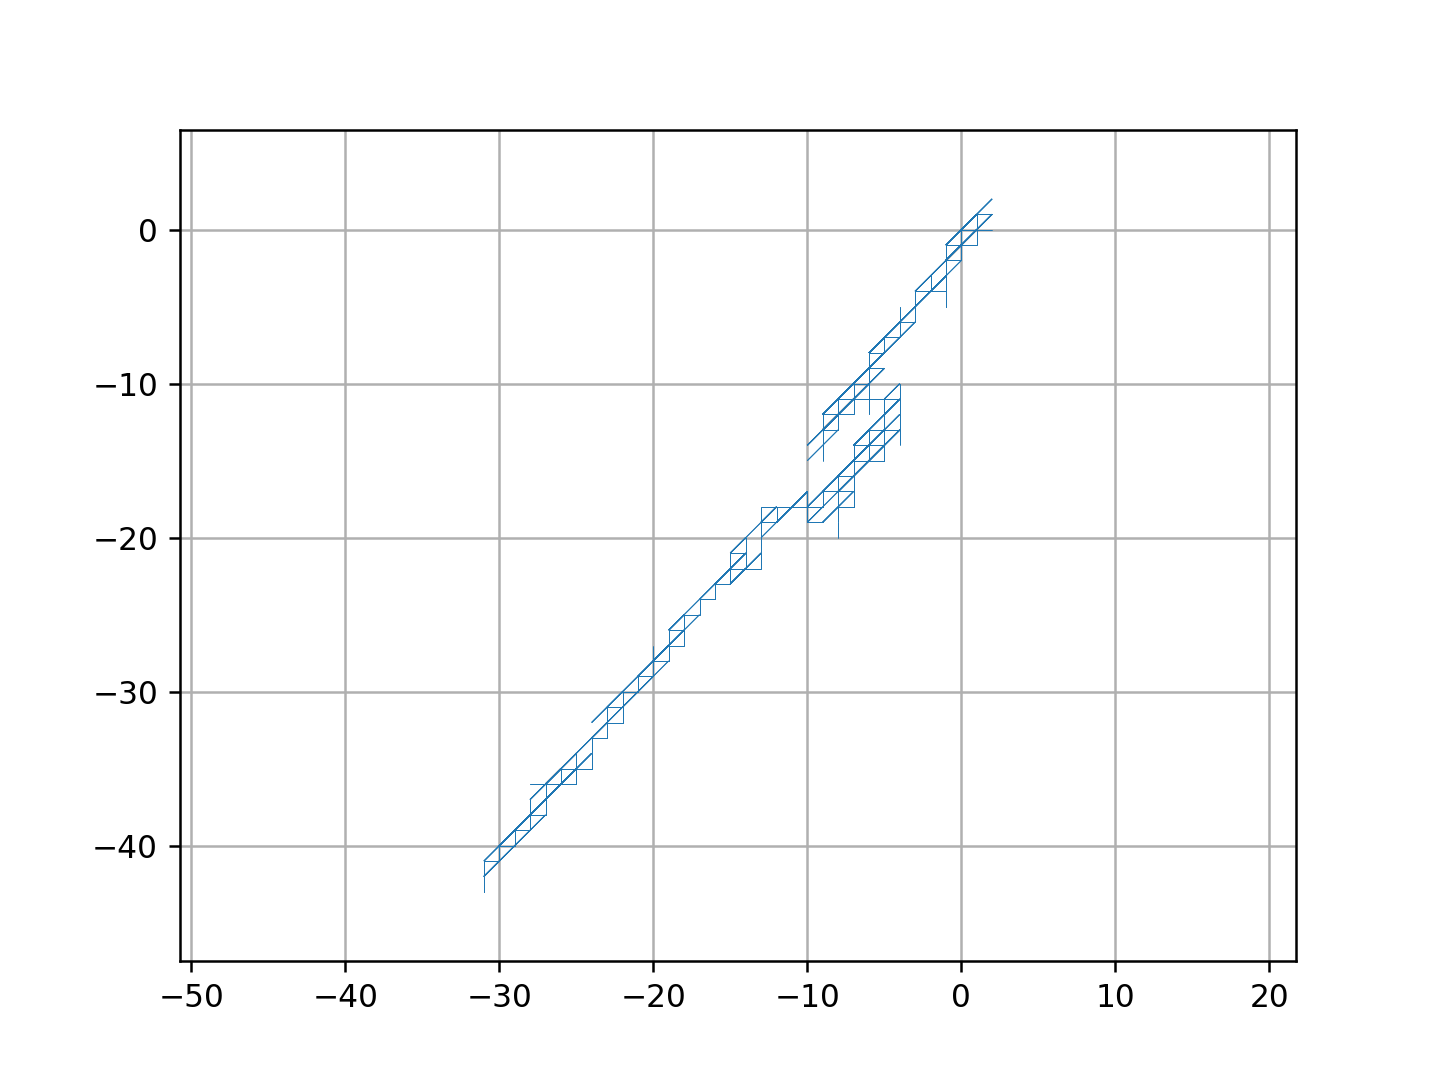

In [11]:
%matplotlib notebook

import numpy as np
import pylab as plt
from matplotlib import collections  as mc

fig, ax = plt.subplots()
    
for el in TrajectoryV1Edges:
    line = []
    line = mc.LineCollection(el, linewidths=0.3)
    ax.add_collection(line)
    ax.autoscale()
    ax.margins(0.1)

plt.grid()
plt.axis('equal')


plt.show()

### Lets Find all the Edges by building a product on all points

Let's try graph libraries

In [16]:
import networkx as nx
G = nx.Graph()

In [17]:
def NotesToEdges(TrajectoryPoints, TrajectoryNoteEdges, Graph):
    listofPoints = []
    for i, dicts in enumerate(TrajectoryPoints):
        for el in dicts:
            Graph.add_node(dicts[el])
        for j in TrajectoryV1Edges[i]:
            Graph.add_edge(j[0], j[1])
    return Graph

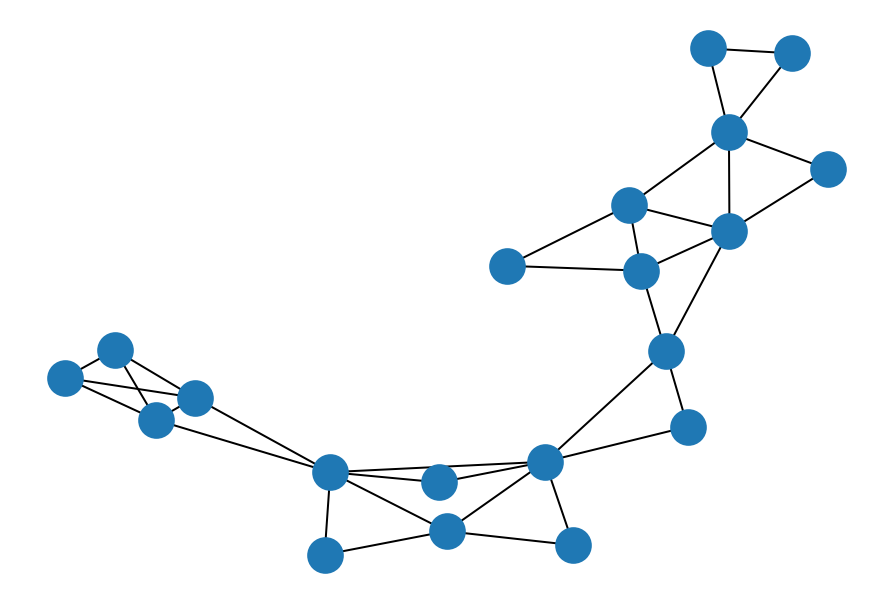

In [18]:
newGraph = NotesToEdges(TrajectoryPoints, TrajectoryNoteEdges, G)
nx.draw(newGraph)
plt.show()